# Assignment 2 is collaborated by Jingting Dai and Hongjie Guan

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
def import_datasets(datasets_folder):
    d={} #empty dictionary
    for item in os.listdir(datasets_folder):
        if 'gml'in item:
            item_path = os.path.join(datasets_folder,item)
            item_name = item.split("_",1)[1].split(".")[0] 
            print("dataset named "+item_name+" imported")
            d["g_{0}".format(item_name)] = nx.read_gml(item_path)
    print("finish importing")
    return d

In [4]:
d_gs = import_datasets('data')   

dataset named AstroPh imported
dataset named jazz_collab imported
dataset named internet imported
dataset named game_thrones imported
dataset named dolphins imported
dataset named florentine_families imported
dataset named terrorists imported
dataset named eu_airlines imported
dataset named celegansInteractomes imported
dataset named facebook imported
dataset named CondMat imported
dataset named chess imported
finish importing


# A02.1 Average degree of the nearest neighbours
Task: For each dataset 𝒢, randomise it to obtain a network
𝒢𝑟𝑛𝑑 and explore their assortativity properties

## 1. Plot the average degree of the nearest neighbours 𝑘𝑛𝑛(𝑘) as a function of the vertices degree 𝑘



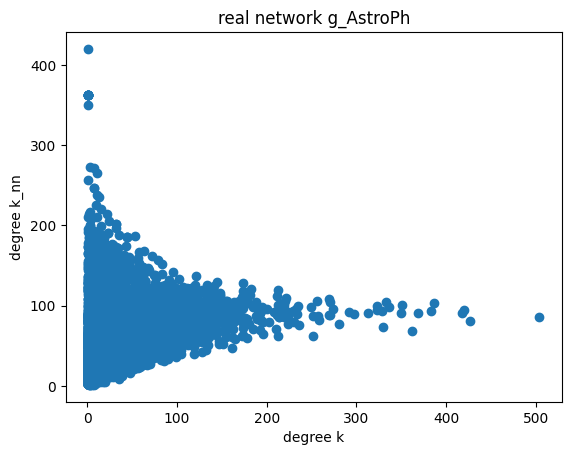

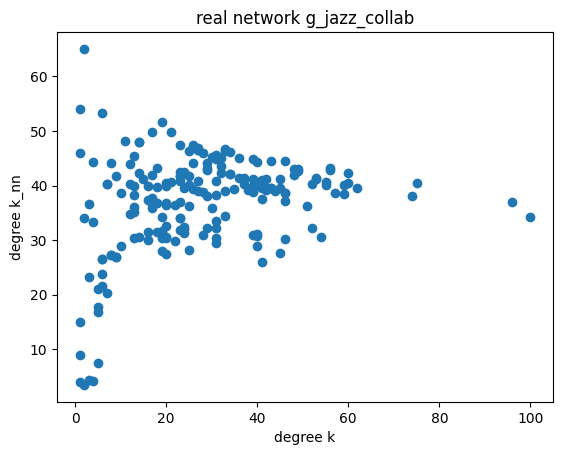

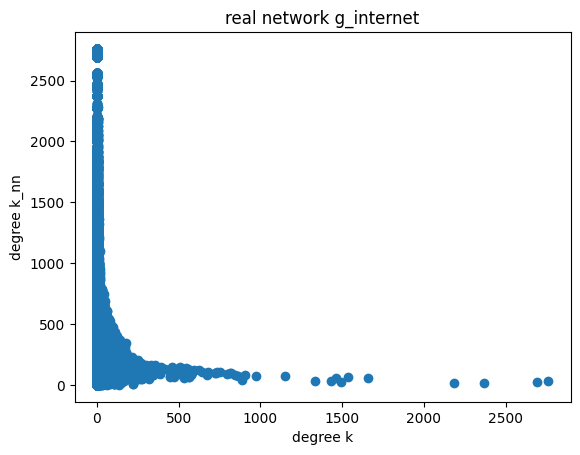

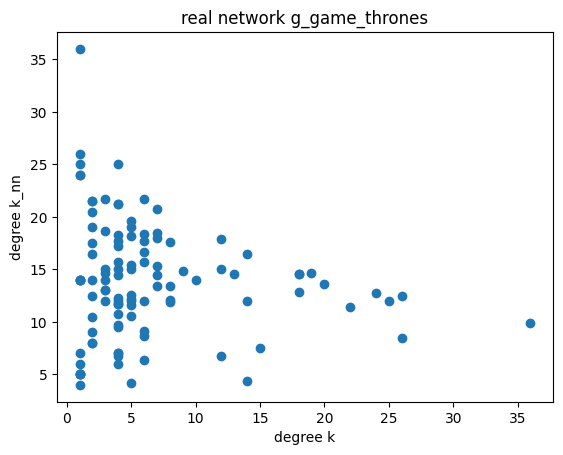

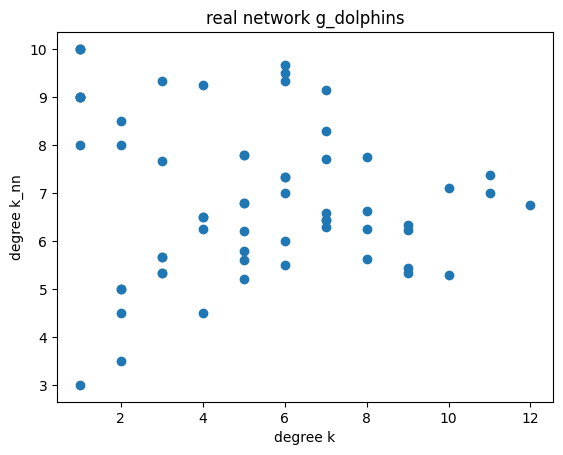

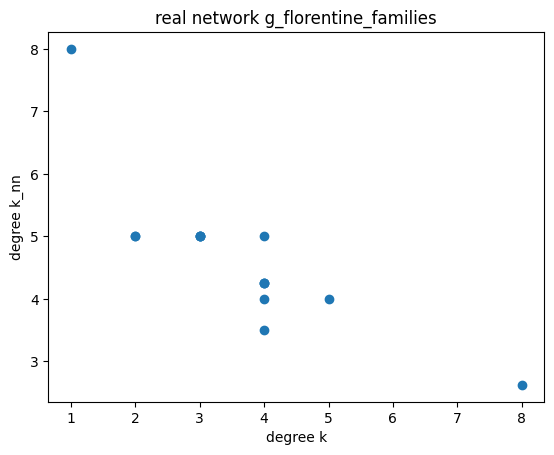

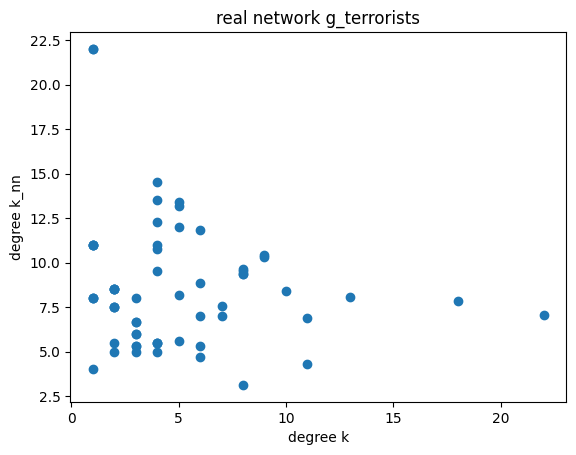

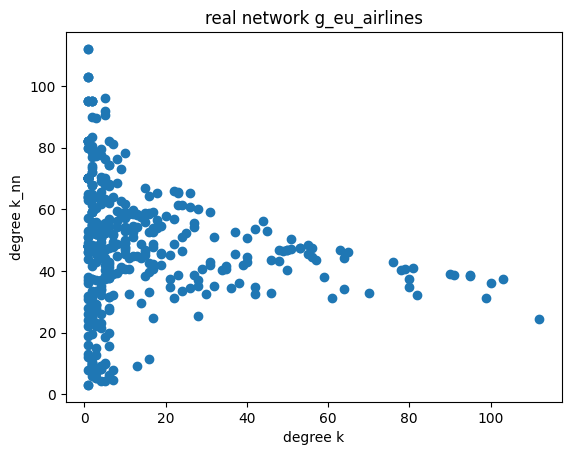

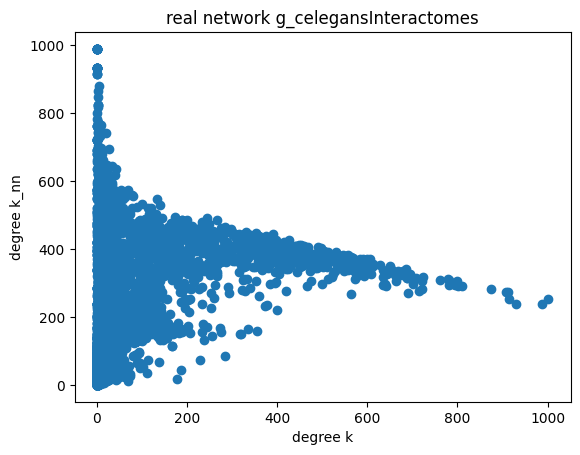

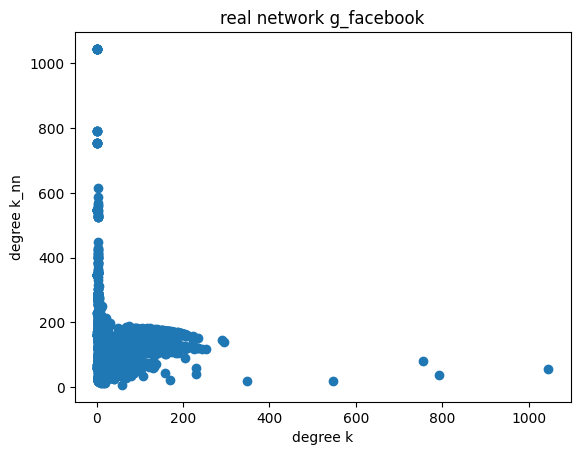

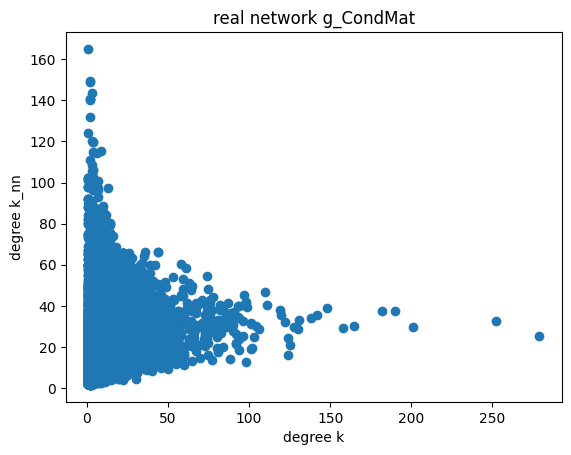

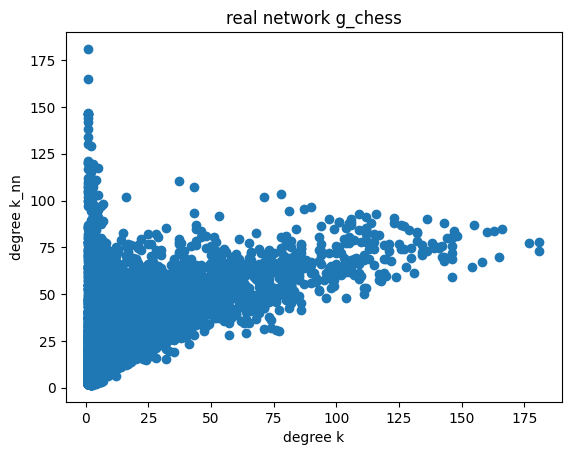

In [8]:
#plot knn(k) for each real networks
for i in d_gs:
    k = [d_gs[i].degree()[j] for j in d_gs[i]]
    avg_nb_k = list(nx.average_neighbor_degree(d_gs[i]).values())
    plt.scatter(k,avg_nb_k)
    plt.xlabel('degree k')
    plt.ylabel('degree k_nn')
    plt.title('real network ' + i)
    plt.show()

In [9]:
#randomise function
#input must be imported gml dictionary
def randomise(networks):
    d={}
    for i in networks:
        d["grnd_{0}".format(i)] = nx.algorithms.smallworld.random_reference(
            networks[i],niter = 10, connectivity=False)
    return d

In [10]:
#randomised datasets dictionary
rnd_gs = randomise(d_gs)

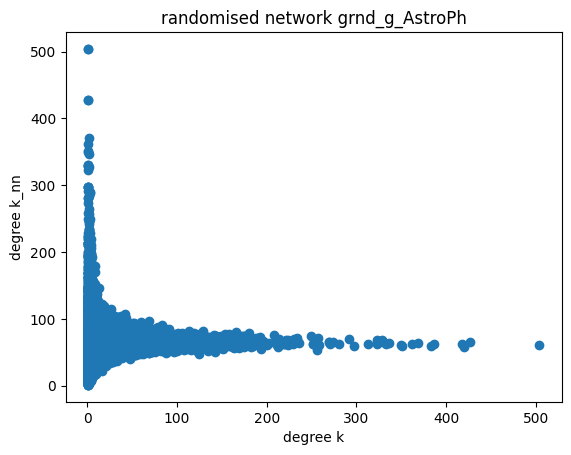

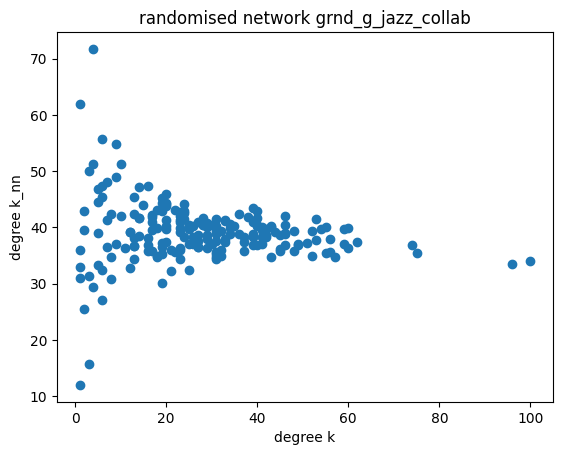

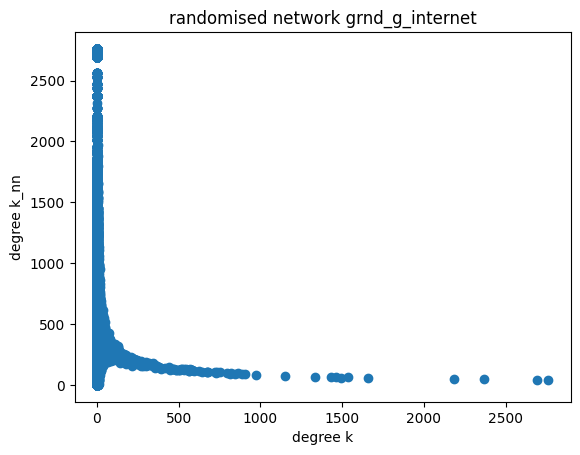

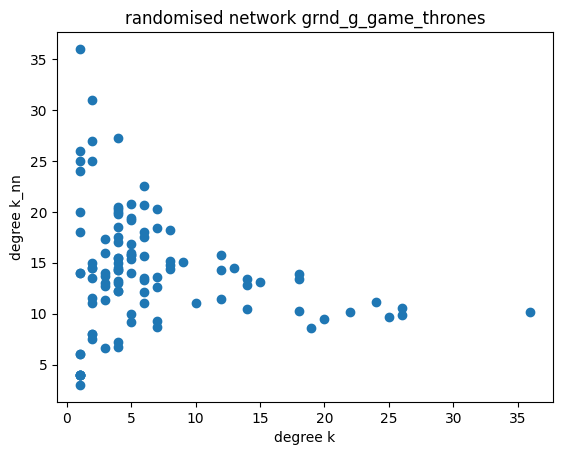

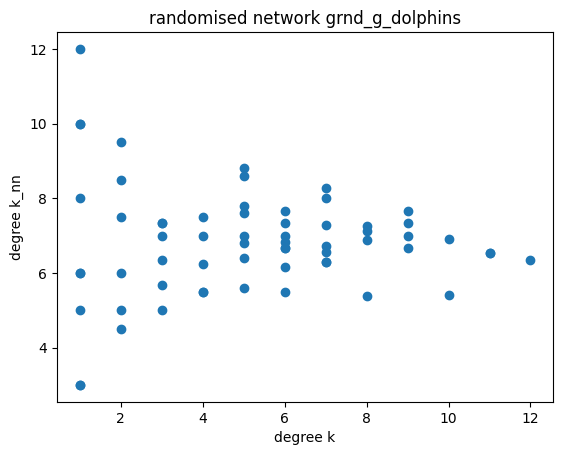

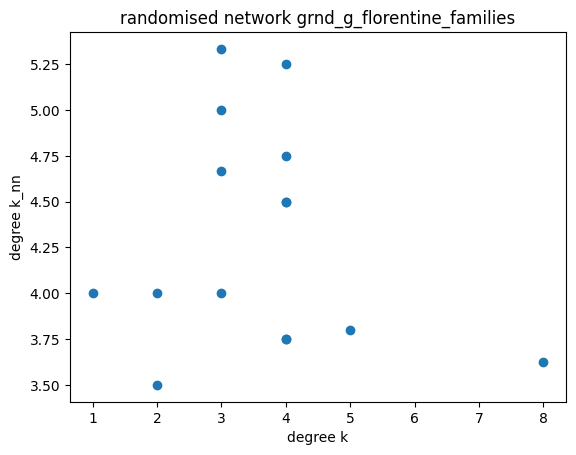

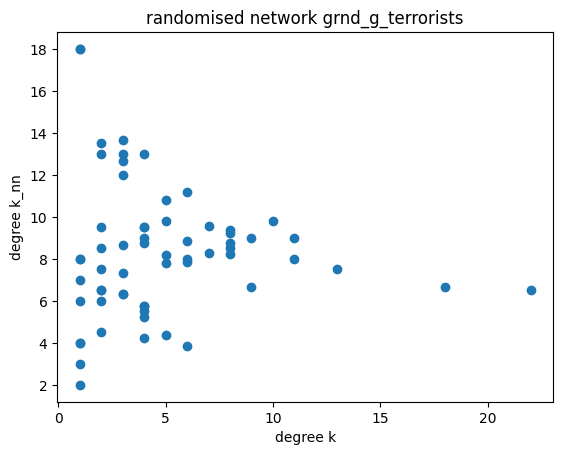

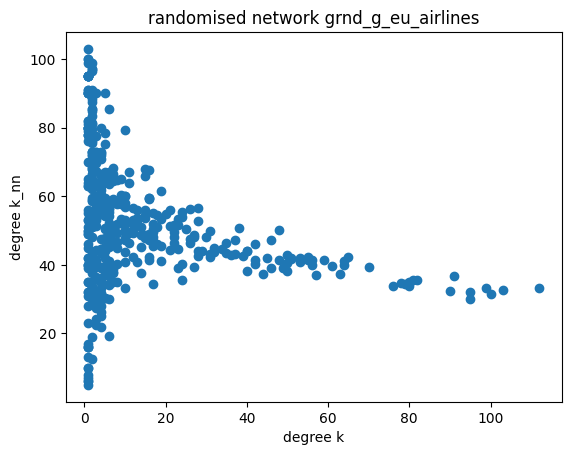

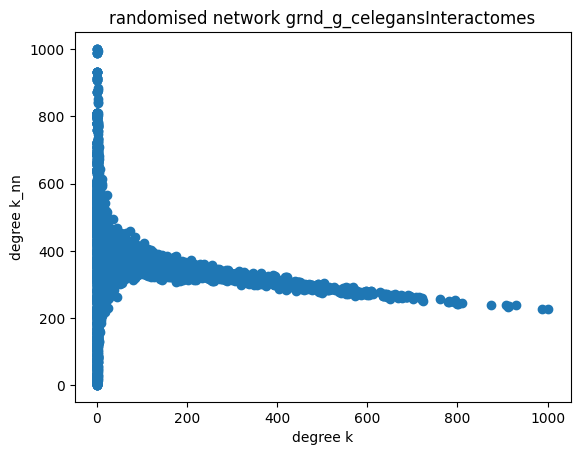

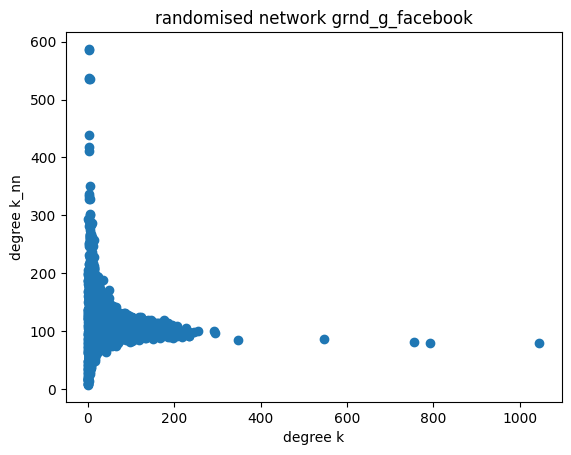

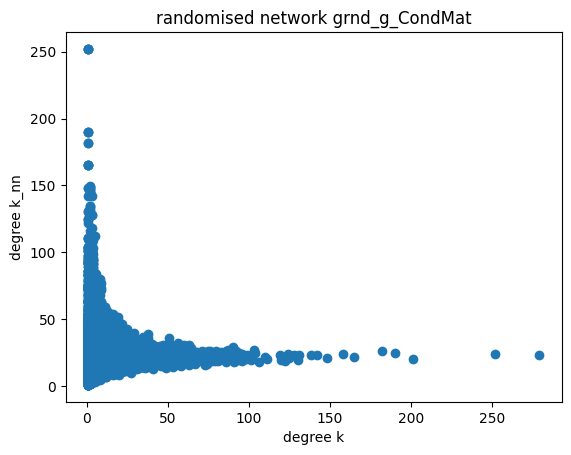

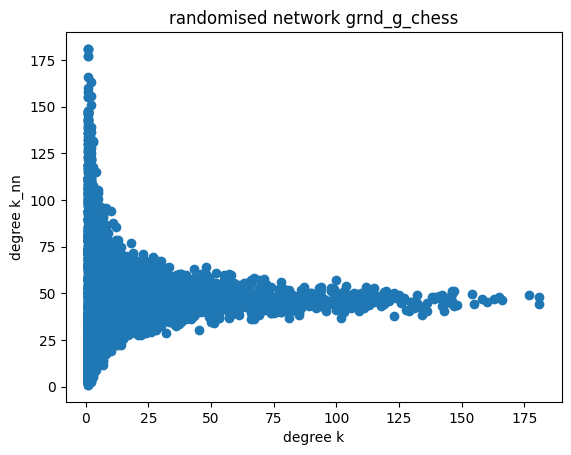

In [11]:
#plot knn(k) for each randomised networks
for i in rnd_gs:
    k_rnd = [rnd_gs[i].degree()[j] for j in rnd_gs[i]]
    avg_nb_k_rnd = list(nx.average_neighbor_degree(rnd_gs[i]).values())
    plt.scatter(k_rnd,avg_nb_k_rnd)
    plt.xlabel('degree k')
    plt.ylabel('degree k_nn')
    plt.title('randomised network ' + i)
    plt.show()

## 2. Compute the assortativity coefficient of the real network

In [12]:
#compute assortativity coefficient of real network and store in dictionary
d_real = {}
for i in d_gs:
    d_real[i] = nx.degree_assortativity_coefficient(d_gs[i])

In [13]:
d_real

{'g_AstroPh': 0.20131706127372678,
 'g_jazz_collab': 0.020237399275047713,
 'g_internet': -0.21486656615730235,
 'g_game_thrones': -0.1307696836693023,
 'g_dolphins': -0.04359402821531255,
 'g_florentine_families': -0.47862867319679353,
 'g_terrorists': -0.08047566178575725,
 'g_eu_airlines': -0.15180413274193835,
 'g_celegansInteractomes': 0.15169796960230705,
 'g_facebook': 0.06357722918564943,
 'g_CondMat': 0.12528250398544855,
 'g_chess': 0.3705153782729769}

## 3. Compute the assortativity coefficient of the randomised network

In [14]:
#compute assortativity coefficient of randomised network and store in dictionary
d_rnd = {}
for i in rnd_gs:
    d_rnd[i] = nx.degree_assortativity_coefficient(rnd_gs[i])

In [15]:
d_rnd

{'grnd_g_AstroPh': -0.007459647487932943,
 'grnd_g_jazz_collab': -0.06475400298399885,
 'grnd_g_internet': -0.19716072880287017,
 'grnd_g_game_thrones': -0.21186356173309331,
 'grnd_g_dolphins': -0.028785097931789985,
 'grnd_g_florentine_families': -0.14203027604630392,
 'grnd_g_terrorists': -0.09618395235002966,
 'grnd_g_eu_airlines': -0.2266738908500728,
 'grnd_g_celegansInteractomes': -0.17848782461231116,
 'grnd_g_facebook': -0.04550028867405727,
 'grnd_g_CondMat': 0.0007364399595908267,
 'grnd_g_chess': -0.013874362020815885}

# A02.2 Clustering and randomisation
For each dataset 𝒢, randomise it to obtain a network 𝒢𝑟𝑛𝑑
and explore their clustering properties

In [16]:
import os
import networkx as nx

def import_datasets(datasets_folder):
    d={} #empty dictionary
    for item in os.listdir(datasets_folder):
        if 'gml'in item:
            item_path = os.path.join(datasets_folder,item)
            item_name = item.split("_",1)[1].split(".")[0] 
            print("dataset named "+item_name+" imported")
            d["g_{0}".format(item_name)] = nx.read_gml(item_path)
    print("finish importing")
    return d

In [17]:
d_gs = import_datasets('data')     

dataset named AstroPh imported
dataset named jazz_collab imported
dataset named internet imported
dataset named game_thrones imported
dataset named dolphins imported
dataset named florentine_families imported
dataset named terrorists imported
dataset named eu_airlines imported
dataset named celegansInteractomes imported
dataset named facebook imported
dataset named CondMat imported
dataset named chess imported
finish importing


In [7]:
d_gs

{'g_AstroPh': <networkx.classes.graph.Graph at 0x1049a3d60>,
 'g_jazz_collab': <networkx.classes.graph.Graph at 0x11d1e2b30>,
 'g_internet': <networkx.classes.graph.Graph at 0x11d10db10>,
 'g_game_thrones': <networkx.classes.graph.Graph at 0x11d1e04c0>,
 'g_dolphins': <networkx.classes.graph.Graph at 0x11d10e8f0>,
 'g_florentine_families': <networkx.classes.graph.Graph at 0x1096064a0>,
 'g_terrorists': <networkx.classes.graph.Graph at 0x1079c7f40>,
 'g_eu_airlines': <networkx.classes.graph.Graph at 0x11b374850>,
 'g_celegansInteractomes': <networkx.classes.graph.Graph at 0x11d1f43a0>,
 'g_facebook': <networkx.classes.graph.Graph at 0x1079c7eb0>,
 'g_CondMat': <networkx.classes.graph.Graph at 0x11d2c1600>,
 'g_chess': <networkx.classes.graph.Graph at 0x11d1f78b0>}

## 1. Plot the degree distribution in double-logscale and mark with a vertical line the average degree ⟨𝑘⟩



## 2. For each node, compute the clustering coefficient in the graphs 𝒢 (denoted by 𝐶(𝑖)) and 𝒢𝑟𝑛𝑑 (denoted as 𝐶𝑟𝑛𝑑(𝑖))

## 3. Do a scatter plot of 𝐶(𝑖) vs. 𝐶𝑟𝑛𝑑(𝑖)